<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/Tugas_Week_1_Classification_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elieser Pasaribu - 1103223209
# Tugas Week 1 - Deep Learning

# 📌 Model PyTorch Berdasarkan Dataset income.csv


# Instalasi PyTorch

In [1]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Import Library

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Load Dataset

In [4]:
df = pd.read_csv('income.csv')
df.isnull().sum()
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Scaling Input & Output

In [5]:
df.columns = df.columns.str.strip()
imputer = SimpleImputer(strategy='mean')
df.loc[:, df.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(df.select_dtypes(include=[np.number]))
df = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In [6]:
target_col = next((col for col in df.columns if "income" in col.lower()), None)

if target_col is None:
    raise ValueError("Kolom target tidak ditemukan!")
y = df[target_col]
X = df.drop(columns=[target_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Convert X_train and X_test to NumPy arrays before creating tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training Model

In [8]:

class IncomeClassifierV2(nn.Module):
    def __init__(self, input_dim):
        super(IncomeClassifierV2, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

        self.leaky_relu = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model_v2 = IncomeClassifierV2(input_dim)
criterion_v2 = nn.BCELoss()
optimizer_v2 = optim.SGD(model_v2.parameters(), lr=0.01, momentum=0.9)

In [9]:
# Training Loop
num_epochs = 200  # Jumlah epoch yang ingin dijalankan

for epoch in range(num_epochs):
    model_v2.train()  # Set model ke mode training
    total_loss = 0

    for batch_X, batch_y in train_loader:
        optimizer_v2.zero_grad()  # Reset gradien sebelum update
        outputs = model_v2(batch_X)  # Forward pass

        # Ensure batch_y is between 0 and 1 before calculating loss
        # If your target values are not probabilities (0 or 1) originally, you need to adjust this part
        batch_y = torch.clamp(batch_y, 0, 1) # clamp values between 0 and 1


        loss = criterion_v2(outputs, batch_y)  # Hitung loss
        loss.backward()  # Backpropagation
        optimizer_v2.step()  # Update parameter

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    # Print hasil setiap 5 epoch
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Model selesai dilatih
print("Training Selesai!")

Epoch [10/200], Loss: 0.3323
Epoch [20/200], Loss: 0.3265
Epoch [30/200], Loss: 0.3192
Epoch [40/200], Loss: 0.3145
Epoch [50/200], Loss: 0.3109
Epoch [60/200], Loss: 0.3050
Epoch [70/200], Loss: 0.2993
Epoch [80/200], Loss: 0.2957
Epoch [90/200], Loss: 0.2914
Epoch [100/200], Loss: 0.2870
Epoch [110/200], Loss: 0.2855
Epoch [120/200], Loss: 0.2805
Epoch [130/200], Loss: 0.2766
Epoch [140/200], Loss: 0.2756
Epoch [150/200], Loss: 0.2733
Epoch [160/200], Loss: 0.2744
Epoch [170/200], Loss: 0.2700
Epoch [180/200], Loss: 0.2690
Epoch [190/200], Loss: 0.2642
Epoch [200/200], Loss: 0.2657
Training Selesai!


# Evaluasi Model yang Sudah Dibuat

In [10]:
model_v2.eval()  # Set model ke mode evaluation
y_pred_probs = []  # Store predicted probabilities
y_true = []  # Store true labels

with torch.no_grad():  # No need to calculate gradients during evaluation
    for batch_X, batch_y in test_loader:
        outputs = model_v2(batch_X)
        y_pred_probs.extend(outputs.squeeze().tolist())  # Get probabilities
        # Convert batch_y to NumPy and then to a list of values
        y_true.extend(batch_y.cpu().numpy().squeeze().tolist())

# Convert to NumPy arrays for sklearn metrics
y_pred_probs = np.array(y_pred_probs)
y_true = np.array(y_true)

# Ensure y_true is binary (0 or 1) if it was originally continuous
y_true = (y_true >= 0).astype(int)  # Assuming values >= 0 are positive class

# Calculate evaluation metrics
y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to predictions (0 or 1)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8650
Precision: 0.1786
Recall: 0.0360
F1 Score: 0.0599
ROC AUC: 0.6443


# Visualisai Hasil

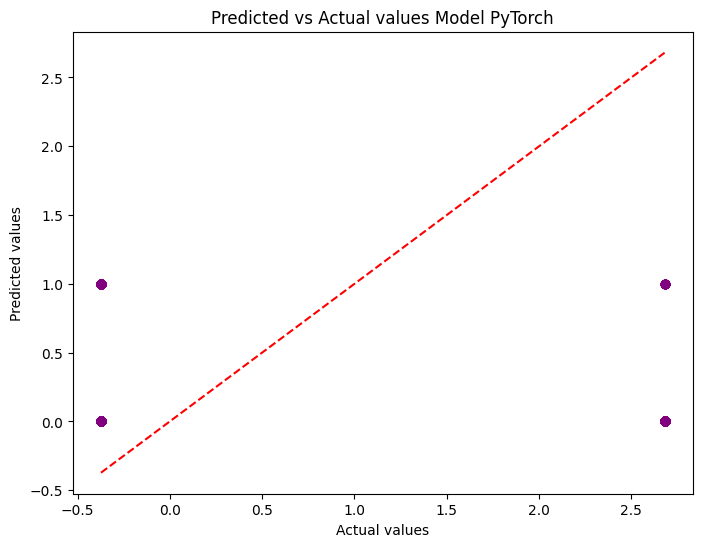

In [12]:

import matplotlib.pyplot as plt

y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test
y_pred_test_np = (y_pred_probs >= 0.5).astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_test_np, color='purple', alpha=0.4)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values Model PyTorch')
plt.show()


# 📌 Model TensorFlow Berdasarkan Dataset income.csv

# Instalasi Tensorflow

In [13]:
!pip install tensorflow

# Import Library

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Training Model

In [16]:

# Define the model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',  # You can use other optimizers like 'sgd'
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=200,  # Adjust the number of epochs
                    batch_size=32,  # Adjust the batch size
                    validation_data=(X_test, y_test))  # Optional: Include validation data

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0000e+00 - loss: -559.0143 - val_accuracy: 0.0000e+00 - val_loss: -11809.0664
Epoch 2/200
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0000e+00 - loss: -27885.1250 - val_accuracy: 0.0000e+00 - val_loss: -99201.8125
Epoch 3/200
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: -146601.2188 - val_accuracy: 0.0000e+00 - val_loss: -305237.0938
Epoch 4/200
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: -391886.0000 - val_accuracy: 0.0000e+00 - val_loss: -652747.0625
Epoch 5/200
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0000e+00 - loss: -792776.5625 - val_accuracy: 0.0000e+00 - val_loss: -1158513.5000
Epoch 6/200
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: -1369723.3750 - val_accuracy: 0.0000e+00 - val_loss: -1845862.0000
Epoch 7/200
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: -2131792.7500 - val_accur

# Evaluasi Model yang Sudah Dibuat

In [17]:
model_v2.eval()  # Set model ke mode evaluation
y_pred_probs = []  # Store predicted probabilities
y_true = []  # Store true labels

with torch.no_grad():  # No need to calculate gradients during evaluation
    for batch_X, batch_y in test_loader:
        outputs = model_v2(batch_X)
        # Detach the tensor from the computation graph before converting to NumPy
        y_pred_probs.extend(outputs.detach().numpy().squeeze().tolist())  # Get probabilities
        y_true.extend(batch_y.numpy().squeeze().tolist())

# Convert to NumPy arrays for sklearn metrics
y_pred_probs = np.array(y_pred_probs)
y_true = np.array(y_true)

# Ensure y_true is binary (0 or 1) if it was originally continuous
y_true = (y_true >= 0).astype(int)  # Assuming values >= 0 are positive class

# Calculate evaluation metrics
y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to predictions (0 or 1)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8650
Precision: 0.1786
Recall: 0.0360
F1 Score: 0.0599
ROC AUC: 0.6443


364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


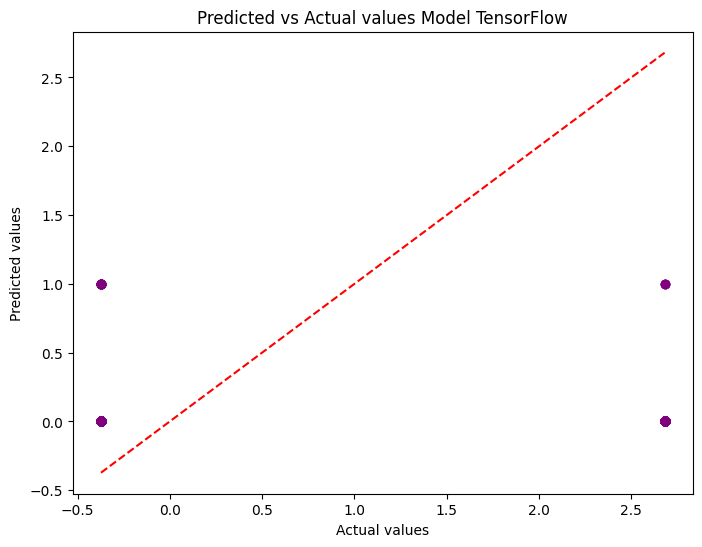

In [20]:


import matplotlib.pyplot as plt
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_test_np = (y_pred_probs >= 0.5).astype(int)

y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test


plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_test_np, color='purple', alpha=0.4)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values Model TensorFlow')
plt.show()
